In [1]:
import numpy
numpy.__version__

'2.4.1'

In [2]:
import numpy as np

# The Basics of NumPy Arrays

In [3]:
import numpy as np

np.random.seed(0)

x1 =np.random.randint(10, size=6)
x2 =np.random.randint(10, size=(3,4))
x3 =np.random.randint(10, size=(3,4,5))

In [4]:
print("x3 ndim:", x3.ndim)
print("x3 shape:", x3.shape)
print("x3 size: ", x3.size)

x3 ndim: 3
x3 shape: (3, 4, 5)
x3 size:  60


In [5]:
print("dtype:", x3.dtype)

dtype: int64


In [6]:
print("itemsize:", x3.itemsize, "bytes")
print("nbytes:", x3.nbytes, "bytes")

itemsize: 8 bytes
nbytes: 480 bytes


## Array Indexing : Accessing Single Element

In [7]:
x1

array([5, 0, 3, 3, 7, 9])

In [8]:
x1[0]

np.int64(5)

In [9]:
x1[4]

np.int64(7)

In [10]:
# To index from the end of the array, you can use negative indices:

x1[-1], x1[-2]

(np.int64(9), np.int64(7))

In [11]:
# In a multidimentional array, you access items using a comma-seprated tuple of indices:

x2

array([[3, 5, 2, 4],
       [7, 6, 8, 8],
       [1, 6, 7, 7]])

In [12]:
x2[0,0]

np.int64(3)

In [13]:
x2[2,0]

np.int64(1)

In [14]:
# You can also modify values using any of the above index notation:

x2[0,0] =12

In [15]:
x1[0] =3.14159
x1

array([3, 0, 3, 3, 7, 9])

## Array Slicing: Accessing Subarray

In [16]:
# One-dimentional subarray

x =np.arange(10)

x[:5]
x[5:]
x[4:7]

array([4, 5, 6])

In [17]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [18]:
x[::2]

array([0, 2, 4, 6, 8])

In [19]:
x[1::2]  # every other  element, starting at index1

array([1, 3, 5, 7, 9])

In [20]:
x[::-1]  # all elements, reversed

array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0])

In [21]:
x[5::-2]  # reversed every other from index 5

array([5, 3, 1])

## Multidimensional subarrays

In [22]:
x2

array([[12,  5,  2,  4],
       [ 7,  6,  8,  8],
       [ 1,  6,  7,  7]])

In [23]:
x2[:2, :3]  # Two rows, three columns

array([[12,  5,  2],
       [ 7,  6,  8]])

In [24]:
x2[:3, ::2]

array([[12,  2],
       [ 7,  8],
       [ 1,  7]])

In [25]:
# Finally subaray dimensions can even be reversed together

x2[::-1, ::-1],x2

(array([[ 7,  7,  6,  1],
        [ 8,  8,  6,  7],
        [ 4,  2,  5, 12]]),
 array([[12,  5,  2,  4],
        [ 7,  6,  8,  8],
        [ 1,  6,  7,  7]]))

`Accessing array rows and columns`

One commonly needed routine is accessing single
rows or columns of an array. You can do this by combining indexing and slicing,
using an empty slice marked by a single colon (:):

In [26]:
print(x2[:, 0]) #first column of x2

[12  7  1]


In [27]:
x2[0, :] # first row of x2

array([12,  5,  2,  4])

In [28]:
# Subarrays as no-copy views

print(x2)

[[12  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


In [29]:
x2_sub=x2[:2, :2]
x2_sub

array([[12,  5],
       [ 7,  6]])

Now if we modify this subarray, well see that the original array is changed observe:

In [30]:
x2_sub[0,0] =99

print(x2_sub)

[[99  5]
 [ 7  6]]


In [31]:
print(x2)

[[99  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


In [32]:
# Creating copies of arrays

x2_sub_copy =x2[:2,:2].copy()
print(x2_sub_copy)

[[99  5]
 [ 7  6]]


In [33]:
x2_sub_copy[0,0] =42
x2_sub_copy

array([[42,  5],
       [ 7,  6]])

## Array Concatenation and Spliting

In [36]:
# Concatenation of arrays

x =np.array([1,2,3])
y =np.array([3,2,1])
np.concatenate([x,y])

array([1, 2, 3, 3, 2, 1])

In [37]:
z = [99,99,23]

print(np.concatenate([x,y,z]))

[ 1  2  3  3  2  1 99 99 23]


In [38]:
grid =np.array([[1,2,3],[4,5,6]])
np.concatenate([grid,grid])

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [41]:
# Concatenate along the second axis (zero-indexed)
np.concatenate([grid,grid], axis=1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

In [42]:
left,right = np.hsplit(grid, [2])
print(left),print(right)

[[1 2]
 [4 5]]
[[3]
 [6]]


(None, None)

## Modifying Values with Fancy Indexing

In [43]:
x =np.arange(10)
i =np.array([2,1,8,4])
x[i]=99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [45]:
np.random.seed(42)
x =np.random.randn(1000)

# compute a histogram by hand
bins =np.linspace(-5, 5, 20)
counts =np.zeros_like(bins)

# find the appropriate bin for each x
i =np.searchsorted(bins, x)

# add 1 to each of these bins
np.add.at(counts, i, 1)

ValueError: 'steps' is not a valid value for ls; supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

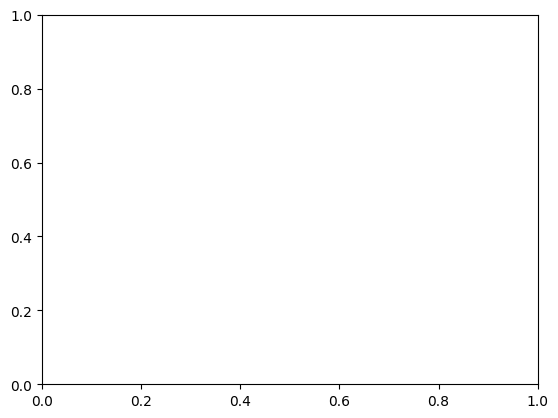

In [47]:
import matplotlib.pyplot as plt
plt.plot(bins, counts, linestyle='steps');

(array([  0.,   0.,   0.,   1.,   5.,  19.,  63., 118., 184., 218., 187.,
        106.,  62.,  27.,   8.,   1.,   1.,   0.,   0.]),
 array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
        -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
         0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
         2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ]),
 [<matplotlib.patches.Polygon at 0x7f50320ad150>])

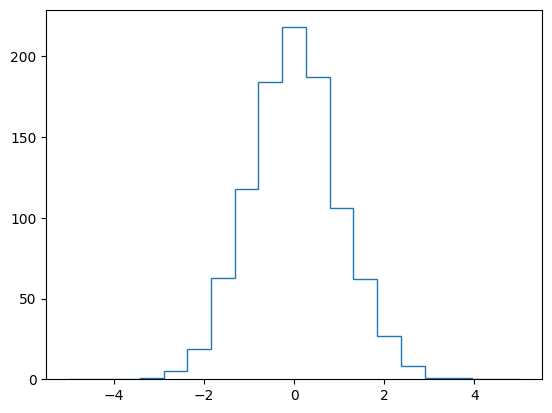

In [48]:
plt.hist(x, bins, histtype='step')